In [2]:
import matplotlib
%matplotlib tk
import matplotlib.pyplot as plt

import numpy as np
import csv


In [48]:
# data = []
# with open('/Users/maddiegamer/Downloads/Error_tracking_spreadsheet - Copy of Sheet1.csv') as csv_file:
        
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         row2 = []
#         for x in row:
#             if x=='':
#                 row2.append(0)
#             else:
#                 row2.append(x)
#         data.append(row2)
# data= np.array(data)


fnames = [
'/home/cat/Downloads/Downloads/2020_3_16_09_59_34_731308_day.csv',
'/home/cat/Downloads/Downloads/2020_3_16_08_59_17_193818_day.csv',
'/home/cat/Downloads/Downloads/2020_3_16_08_59_17_534732_day.csv',
'/home/cat/Downloads/Downloads/2020_3_16_08_59_17_358257_night.csv',
'/home/cat/Downloads/Downloads/2020_3_16_12_54_07_193951_night.csv',
'/home/cat/Downloads/Downloads/2020_3_16_10_59_50_448686_night.csv',
]

data_a = []
for fname in fnames:
    data = []
    with open(fname) as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            row2 = []
            for x in row:
                if x=='':
                    row2.append(0)
                else:
                    row2.append(x)
            data.append(row2)
    data=np.array(data)
    print(data.shape)
    data_a.append(data)


(10, 17)
(7, 17)
(6, 17)
(10, 17)
(9, 17)
(11, 17)


In [123]:
# search for cyan errors:
import os
animal_names = ['female','male','pup1','pup2']
error_type = ["red", "blue", "cyan", "green"]

# 
animal_starting_columns = [1,5,9,13]

daytime_errors = np.zeros((3,4,4),'int32')
nighttime_errors = np.zeros((3,4,4),'int32')
dd=0
nn=0
ctr=0
for ctr_data, data in enumerate(data_a):
    for animal_id, animal_col in enumerate(animal_starting_columns):
        #animal_col= 1
        name = "female"
        animal_col_total = 4  # but we dont' have it

        sums = np.zeros(4)
        for i in range(data.shape[0]):
            for e in range(len(error_type)):
                if error_type[e] in data[i, animal_col]:
                    #sums_block [e] += int(data[i, animal_col_total])
                    sums [e] += int(data[i, animal_col+2]) - int(data[i, animal_col+1])

        #print (animal_names[ctr], sums)
        #sums+=1
        #print (sums)
        ax=plt.subplot(6,4,ctr+1)
        plt.title(animal_names[animal_id])
        for k in range(4):
            if sums[k]>0:
                ax.bar(k, sums[k], .9, color = error_type[k])
        ctr+=1


        colors = {'female '+str(sums[0]):'red', 
                  'male '+str(sums[1]):'blue',
                 'pup1 '+str(sums[2]):'cyan',
                 'pup2 '+str(sums[3]):'green'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        plt.legend(handles, labels,fontsize=6)
        #plt.semilogy(1,1E5)
        plt.ylim(1,1E4)
        plt.xlim(-0.5,3.5)
        if animal_id==0:
            if 'night' in fnames[ctr_data]:
                plt.ylabel('night', fontsize=10)
            else:
                plt.ylabel('day', fontsize=10)

        if 'day' in fnames[ctr_data]:
            daytime_errors[dd,animal_id]=sums
        else:
            nighttime_errors[nn,animal_id]=sums
            
    if 'day' in fnames[ctr_data]:
        dd+=1            
    else:
        nn+=1

plt.show()
    
    

In [124]:
clrs = ["red", "blue", "cyan", "green"]


print (nighttime_errors)
print (daytime_errors)

# 
for k in range(4):
    ax=plt.subplot(2,2,k+1)
    for p in range(4):
        temp = nighttime_errors[:,k,p]
        print ("temp: ", temp)

        # 
        plt.scatter(np.zeros(temp.shape[0])+p, 
                    temp, 
                    s=200,
                    alpha=.5,
                    c=clrs[p])

        mean_all = temp.mean()
        plt.scatter(np.zeros(1)+p, mean_all, s=500,
                    alpha=1,
                    c=clrs[p])
    plt.xlim(-0.5,4)
    plt.ylim(0,10000)
    plt.title(animal_names[k])
    plt.xticks(np.arange(4), animal_names)
plt.suptitle("NIGHTIME",fontsize=30)
plt.show()


[[[    0     0   468    30]
  [   74     0  2271   289]
  [ 2418   370     0  2651]
  [    0    46 15347     0]]

 [[    0     0    68     0]
  [    0     0    84   173]
  [  101     0     0  2241]
  [    0     0  1792     0]]

 [[    0     0  1420  1692]
  [    0     0   609  3727]
  [    0   762     0 16140]
  [    0   251  2006     0]]]
[[[   0    0 5574    0]
  [   0    0    0    0]
  [1408    0    0 2108]
  [   0    0 3604    0]]

 [[   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0 6271]
  [   0    0  183    0]]

 [[   0    0 4936   32]
  [   0    0    0    0]
  [   0    0    0  955]
  [   0  521  698    0]]]
temp:  [0 0 0]
temp:  [0 0 0]
temp:  [ 468   68 1420]
temp:  [  30    0 1692]
temp:  [74  0  0]
temp:  [0 0 0]
temp:  [2271   84  609]
temp:  [ 289  173 3727]
temp:  [2418  101    0]
temp:  [370   0 762]
temp:  [0 0 0]
temp:  [ 2651  2241 16140]
temp:  [0 0 0]
temp:  [ 46   0 251]
temp:  [15347  1792  2006]
temp:  [0 0 0]


In [31]:
f, (ax, ax2) = plt.subplots(1,2,sharex=True, facecolor = 'w')

ax.bar([1,2,3,4], sums_female, .9, color = error_type)
ax.bar([11,12,13,14], sums_male, .9, color = error_type)
ax.bar([21,22,23,24], sums_unshaved, .9, color = error_type)
ax.bar([31,32,33,34], sums_shaved, .9, color = error_type)
ax.bar([41,42,43,44], sums_block, .9, color = error_type)

ax2.bar([1,2,3,4], sums_female, .9, color = error_type)
ax2.bar([11,12,13,14], sums_male, .9, color = error_type)
ax2.bar([21,22,23,24], sums_unshaved, .9, color = error_type)
ax2.bar([31,32,33,34], sums_shaved, .9, color = error_type)
ax2.bar([41,42,43,44], sums_block, .9, color = error_type)

ax.set_ylim(0,6000)
ax2.set_ylim(60000,65000)


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_bottom()
ax.tick_params(labelright='off')
ax2.xaxis.tick_top()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

NameError: name 'sums_female' is not defined

In [ ]:
#wooden block
print ("shape: ", data.shape)
animal_col= 17
name = "block"
animal_col_total = 20

sums_block = np.zeros(4)
for i in range(data.shape[0]):
    
    for e in range(len(error_type)):
        if error_type[e] in data[i, animal_col]:
            sums_block [e]=sums_block[e]+ int(data[i, animal_col_total])
        
print ("error_type", error_type)        
print ("sums", sums)

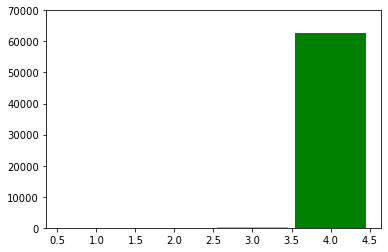

In [40]:
plt.bar([1,2,3,4], sums_block, .9, color = error_type)

plt.ylim(0,70000)
plt.show()

In [267]:
# search for cyan, green errors
print ("shape: ", data.shape)
index = 1
sums = 0
for row in range (data.shape[0]):
    if data[row, index]=='cyan, green':
        print (data[row, index], "# errors : ", data[row, 4])
        sums = sums + int(data[row, 4])
        
print (sums)

shape:  (40, 22)
cyan, green # errors :  75
cyan, green # errors :  567
642


In [268]:
# search for blue, green errors
print ("shape: ", data.shape)
index = 1
sums = 0
for row in range (data.shape[0]):
    if data [row, index]=='blue, green':
        print (data[row, index], "# errors : ", data [row, 4])
        sums = sums + int (data[row, 4])
        
print (sums)

shape:  (40, 22)
blue, green # errors :  174
blue, green # errors :  391
565


In [269]:
# 6th column: male error type
index = 5

print ("all column: ", data[:, index])
print ('')

index = 5
row = 0

print ("second element: ", data[:, index][0])

all column:  ['0' '0' '0' 'Male\n(error type)' 'cyan' 'cyan' 'red' 'green' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']

second element:  0


In [270]:
# how many errors for second cell
index = 8
print ("all errors: ", data[:,8])


index = 8
print ("# errors second row: ", data[:,8][row])

all errors:  ['0' '0' '0' 'TOTAL' '11' '40' '25' '92' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0']
# errors first row:  0


In [271]:
# search for cyan errors:
print ("shape: ", data.shape)
index = 5
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='cyan':
        print (data[row,index], "# errors : ", data[row, 8]) 
        sums = sums + int(data[row, 8])
        
print (sums)

shape:  (40, 22)
cyan # errors :  11
cyan # errors :  40
51


In [272]:
# search for red errors:
print ("shape: ", data.shape)
index = 5
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='red':
        print (data[row,index], "# errors : ", data[row, 8]) 
        sums = sums + int(data[row, 8])
        
print (sums)

shape:  (40, 22)
red # errors :  25
25


In [273]:
# search for green errors:
print ("shape: ", data.shape)
index= 5
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='green':
        print (data[row,index], "# errors : ", data[row, 8]) 
        sums = sums + int(data[row, 8])
        
print (sums)

shape:  (40, 22)
green # errors :  92
92


In [274]:
# 10th column: unshaved pup error type
index = 9

print ("all column: ", data[:, index])
print ('')

index = 9
row = 0

print ("third element: ", data[:, index][0])

all column:  ['0' '0' '0' 'Pup1 \n(unshaved)\nError type' 'blue' 'red' 'red' 'red'
 'blue' 'red' 'red' 'blue, cyan, red' 'blue, red' 'cyan' 'cyan' 'cyan'
 'blue' 'blue, cyan' 'blue' 'blue' 'blue' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']

second element:  0


In [275]:
# how many errors for third cell
index = 12
print ("all errors: ", data[:,12])


index = 12
print ("# errors third row: ", data[:,12][row])

all errors:  ['0' '0' '0' 'TOTAL' '318' '18' '515' '518' '717' '50' '144' '198' '12'
 '144' '77' '629' '73' '68' '59' '24' '58' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
# errors first row:  0


In [276]:
# search for blue errors:
print ("shape: ", data.shape)
index = 9
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue':
        print (data[row,index], "# errors : ", data[row, 12]) 
        sums = sums + int(data[row, 12])
        
print (sums)

shape:  (40, 22)
blue # errors :  318
blue # errors :  717
blue # errors :  73
blue # errors :  59
blue # errors :  24
blue # errors :  58
1249


In [277]:
# search for red errors:
print ("shape: ", data.shape)
index = 9
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='red':
        print (data[row,index], "# errors : ", data[row, 12]) 
        print(data[row, 12])
        sums = sums + int(data[row, 12])
        
print (sums)

shape:  (40, 22)
red # errors :  18
18
red # errors :  515
515
red # errors :  518
518
red # errors :  50
50
red # errors :  144
144
1245


In [278]:
# search for blue, cyan, red errors:
print ("shape: ", data.shape)
index = 9
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue, cyan, red':
        print (data[row,index], "# errors : ", data[row, 12]) 
        print(data[row, 12])
        sums = sums + int(data[row, 12])
        
print(sums)

shape:  (40, 22)
blue, cyan, red # errors :  198
198
198


In [280]:
# search for blue, red errors:
print ("shape: ", data.shape)
index = 9
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue, red':
        print (data[row,index], "# errors : ", data[row, 12]) 
        print(data[row, 12])
        sums = sums + int(data[row, 12])
        
print (sums)

shape:  (40, 22)
blue, red # errors :  12
12
12


In [281]:
# search for blue, cyan errors:
print ("shape: ", data.shape)
index = 9
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue, cyan':
        print (data[row,index], "# errors : ", data[row, 12]) 
        print(data[row, 12])
        sums = sums + int(data[row, 12])
        
print (sums)

shape:  (40, 22)
blue, cyan # errors :  68
68
68


In [282]:
# 14th column: shaved pup error type
index = 13

print ("all column: ", data[:, index])
print ('')

index = 13
row = 0

print ("fourth element: ", data[:, index][0])

all column:  ['0' '0' '0' 'Pup2\n(shaved)\nError type' 'red' 'green' 'green' 'green'
 'green' 'green' 'green' 'red' 'red' 'green' 'blue' 'green' 'green'
 'green' 'blue' 'blue' 'green' 'red' 'green' 'blue' 'red' 'green' 'green'
 'green' 'red' 'green' 'green, red' 'green' 'green' 'green, red' 'green'
 'green' 'green, red' 'green' 'blue, green' 'green']

fourth element:  0


In [283]:
# how many errors for fourth cell
index = 16
print ("all errors: ", data[:,16])


index = 16
print ("# errors fourth row: ", data[:,16][row])

all errors:  ['0' '0' '0' 'TOTAL' '916' '164' '211' '714' '186' '19' '80' '65' '12'
 '21' '21' '7' '91' '162' '72' '554' '56' '86' '47' '141' '34' '67' '285'
 '31' '144' '301' '431' '508' '279' '511' '96' '493' '132' '370' '161'
 '152']
# errors fourth row:  0


In [284]:
# search for red errors:
print ("shape: ", data.shape)
index = 13
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='red':
        print (data[row,index], "# errors : ", data[row, 16]) 
        sums = sums + int(data[row, 16])
        
print (sums)

shape:  (40, 22)
red # errors :  916
red # errors :  65
red # errors :  12
red # errors :  86
red # errors :  34
red # errors :  144
1257


In [285]:
# search for green errors:
print ("shape: ", data.shape)
index = 13
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='green':
        print (data[row,index], "# errors : ", data[row, 16]) 
        sums = sums + int(data[row, 16])
        
print (sums)

shape:  (40, 22)
green # errors :  164
green # errors :  211
green # errors :  714
green # errors :  186
green # errors :  19
green # errors :  80
green # errors :  21
green # errors :  7
green # errors :  91
green # errors :  162
green # errors :  56
green # errors :  47
green # errors :  67
green # errors :  285
green # errors :  31
green # errors :  301
green # errors :  508
green # errors :  279
green # errors :  96
green # errors :  493
green # errors :  370
green # errors :  152
4340


In [286]:
# search for blue errors:
print ("shape: ", data.shape)
index = 13
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue':
        print (data[row,index], "# errors : ", data[row, 16]) 
        sums = sums + int(data[row, 16])
        
print (sums)

shape:  (40, 22)
blue # errors :  21
blue # errors :  72
blue # errors :  554
blue # errors :  141
788


In [287]:
# search for green, red errors:
print ("shape: ", data.shape)
index = 13
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='green, red':
        print (data[row,index], "# errors : ", data[row, 16]) 
        sums = sums + int(data[row, 16])
        
print (sums)

shape:  (40, 22)
green, red # errors :  431
green, red # errors :  511
green, red # errors :  132
1074


In [288]:
# search for blue, green errors:
print ("shape: ", data.shape)
index = 13
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='blue, green':
        print (data[row,index], "# errors : ", data[row, 16]) 
        sums = sums + int(data[row, 16])
        
print (sums)

shape:  (40, 22)
blue, green # errors :  161
161


In [289]:
# 18th column: wooden block error type
index = 17

print ("all column: ", data[:, index])
print ('')

index = 17
row = 0

print ("fifth element: ", data[:, index][0])

all column:  ['0' '0' '0' 'Wooden\nBlock\nError type' 'green' 'green' 'green' 'cyan'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'cyan'
 'cyan' 'cyan' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '**blank area in bottom left corner' '0' '0']

fifth element:  0


In [290]:
# how many errors for fifth cell
index = 20
print ("all errors: ", data[:,20])


index = 20
print ("# errors fifth row: ", data[:,20][row])

all errors:  ['0' '0' '0' 'TOTAL' '16044' '170' '4020' '17' '551' '198' '41' '39' '95'
 '4796' '4146' '32652' '13' '21' '100' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '66057' '0' '0']
# errors fifth row:  0


In [291]:
# search for green errors:
print ("shape: ", data.shape)
index = 17
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='green':
        print (data[row,index], "# errors : ", data[row, 20]) 
        sums = sums + int(data[row, 20])
        
print (sums)

shape:  (40, 22)
green # errors :  16044
green # errors :  170
green # errors :  4020
green # errors :  551
green # errors :  198
green # errors :  41
green # errors :  39
green # errors :  95
green # errors :  4796
green # errors :  4146
green # errors :  32652
62752


In [292]:
# search for cyan errors:
print ("shape: ", data.shape)
index = 17
sums = 0
for row in range(data.shape[0]):
    if data[row,index]=='cyan':
        print (data[row,index], "# errors : ", data[row, 20]) 
        sums = sums + int(data[row, 20])
        
print (sums)

shape:  (40, 22)
cyan # errors :  17
cyan # errors :  13
cyan # errors :  21
cyan # errors :  100
151


In [ ]:
#bar graph

objects = ('blue', 'cyan', 'green', 'red', 'blue, green', 'blue, cyan', 'blue, red','cyan, green', 'green, red', 'blue, cyan, red')
y_pos = np.arange(len(objects))
sums = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()